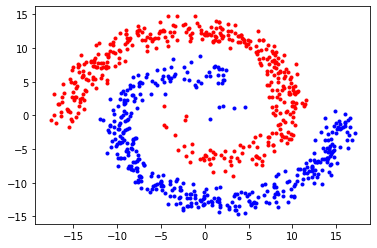

In [36]:
import random
import math
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
N = 400
theta = np.sqrt(np.random.rand(N))*2*pi

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x1=data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x2=data_b + np.random.randn(N,2)
y=[]
plt.plot(x1[:,0],x1[:,1],"b.")
plt.plot(x2[:,0],x2[:,1],"r.")



plt.show()

In [37]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 1
        
        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

In [39]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(x1,x2)
    err.append(np.mean(np.square(x2 - NN.feedForward(x1))))

plt.plot(err)

ValueError: shapes (400,2) and (1,10) not aligned: 2 (dim 1) != 1 (dim 0)